In [1]:
import os
from astropy.table import Table
from astropy.stats import mad_std
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
out_dir = '/data2/deep_galaxy_models/results_realnvp/'

stamps_path = os.path.join(out_dir, 'postage_stamps.fits')
cat_real_path = os.path.join(out_dir, 'catalog_real.fits')
cat_mock_path = os.path.join(out_dir, 'catalog_mock.fits')
cat_param_path = os.path.join(out_dir, 'catalog_param.fits')

cat = Table.read(stamps_path)    
print("Done loading postage stamps")

m_real = Table.read(cat_real_path)
m_mock = Table.read(cat_mock_path)
m_param = Table.read(cat_param_path)
print("Done loading morphology statistics")

Done loading postage stamps
Done loading morphology statistics


In [3]:
# Remove offensive objects
mask = m_real['flag'] & m_mock['flag'] & m_param['flag']
mask &= m_real['flag_morph'] & m_mock['flag_morph'] & m_param['flag_morph'] 
mask &= ~isnan(m_real['M20']) & ~isnan(m_mock['M20']) & ~isnan(m_param['M20'])
m = mask

In [14]:
import seaborn as sns
sns.set()
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2})

creal = plt.cm.viridis(0.1)
cmock = plt.cm.viridis(0.35)
cparam = plt.cm.viridis(0.8)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  after removing the cwd from sys.path.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  # This is added back by InteractiveShellApp.init_path()
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.


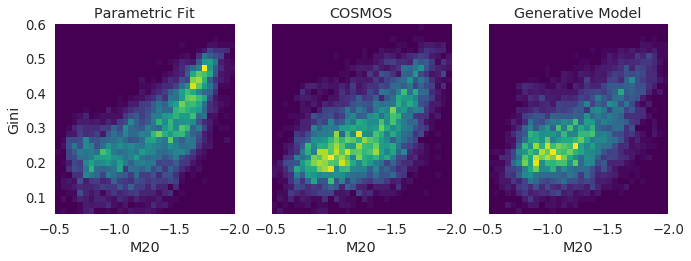

In [50]:
figure(figsize=(11,3.5))
subplot(131)
hist2d(m_param['M20'][m], m_param['Gini'][m],32,range=[[-2.,-0.5],[0.05,0.6]], 
       cmap='viridis', normed=True);
xlim(-0.5,-2.)
ylabel('Gini')
xlabel('M20')
title('Parametric Fit')
subplot(132,yticklabels=[])
hist2d(m_real['M20'][m], m_real['Gini'][m],32,range=[[-2.,-0.5],[0.05,0.6]], 
       cmap='viridis', normed=True);
xlim(-0.5,-2.)
xlabel('M20')

title('COSMOS')
subplot(133,yticklabels=[],)
hist2d(m_mock['M20'][m], m_mock['Gini'][m],32,range=[[-2.,-0.5],[0.05,0.6]],
       cmap='viridis', normed=True);
xlim(-0.5,-2.)
xlabel('M20')

title('Generative Model')
savefig("Figures/Figure_gini_m20.pdf", bbox_inches = 'tight', pad_inches = 0)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  after removing the cwd from sys.path.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  # This is added back by InteractiveShellApp.init_path()
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.


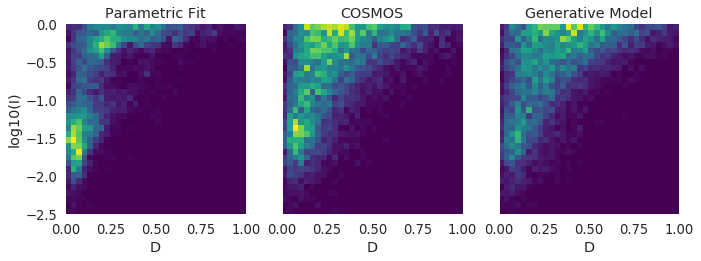

In [51]:
figure(figsize=(11,3.5))
subplot(131)
m = m_param['flag_morph'] & (m_param['I'] >0)
hist2d(m_param['D'][m], log10(m_param['I'][m]),32, range=[[0,1],[-2.5,0]], cmap='viridis', normed=True);
xlabel('D')
ylabel('log10(I)')
title('Parametric Fit')

subplot(132,yticklabels=[])
m = m_real['flag_morph'] & (m_real['I'] >0)
hist2d(m_real['D'][m], log10(m_real['I'][m]),32, range=[[0,1],[-2.5,0]], cmap='viridis', normed=True);
xlabel('D')
#ylabel('log10(I)')
title('COSMOS')

subplot(133,yticklabels=[])
m = m_mock['flag_morph'] #& (m_mock['I'] >0)
hist2d(m_mock['D'][m], log10(m_mock['I'][m]),32, range=[[0,1],[-2.5,0]], cmap='viridis', normed=True);
xlabel('D')
#ylabel('log10(I)')
title('Generative Model')

savefig("Figures/Figure_ID.pdf", bbox_inches = 'tight', pad_inches = 0)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  after removing the cwd from sys.path.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  # This is added back by InteractiveShellApp.init_path()
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.


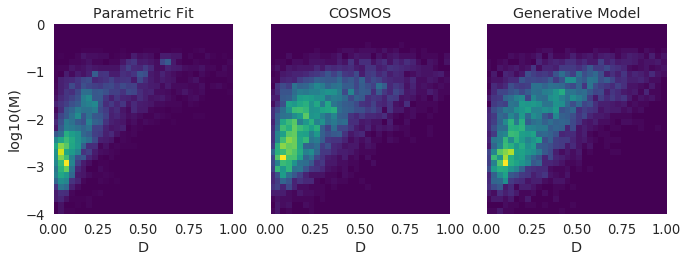

In [54]:
figure(figsize=(11,3.5))
subplot(131)
m = m_param['flag_morph'] & (m_param['I'] >0) & (m_param['M'] >0)
hist2d( (m_param['D'][m]),log10(m_param['M'][m]),32, range=[[0,1], [-4,0]], cmap='viridis', normed=True);
ylabel('log10(M)')
xlabel('D')
title('Parametric Fit')

subplot(132,yticklabels=[])
m = m_real['flag_morph'] & (m_real['I'] >0)& (m_real['M'] >0)
hist2d( (m_real['D'][m]),log10(m_real['M'][m]),32, range=[[0,1], [-4,0]], cmap='viridis', normed=True);
#ylabel('log10(M)')
xlabel('D')
title('COSMOS')

subplot(133,yticklabels=[])
m = m_mock['flag_morph'] & (m_mock['I'] >0)& (m_mock['M'] >0)
hist2d((m_mock['D'][m]),log10(m_mock['M'][m]), 32, range=[[0,1], [-4,0]], cmap='viridis', normed=True);
#ylabel('log10(M)')
xlabel('D')
title('Generative Model')
savefig("Figures/Figure_MD.pdf", bbox_inches = 'tight', pad_inches = 0)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  """
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  del sys.path[0]
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.


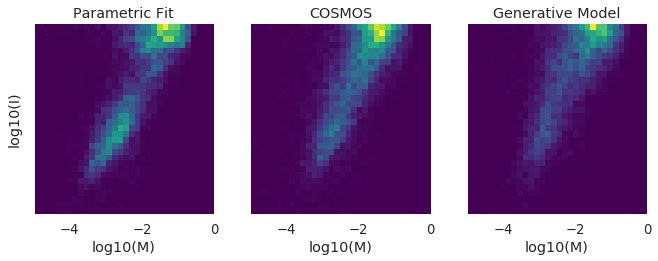

In [53]:
figure(figsize=(11,3.5))
subplot(131,yticklabels=[])
m = m_param['flag_morph'] & (m_param['I'] >0) & (m_param['M'] >0)
hist2d(log10(m_param['M'][m]), log10(m_param['I'][m]),32, range=[[-5,0],[-2.5,0]], 
       cmap='viridis',normed=True);
ylabel('log10(I)')
xlabel('log10(M)')
title('Parametric Fit')

subplot(132,yticklabels=[])
m = m_real['flag_morph'] & (m_real['I'] >0)& (m_real['M'] >0)
hist2d(log10(m_real['M'][m]), log10(m_real['I'][m]),32, range=[[-5,0],[-2.5,0]],
       cmap='viridis',normed=True);
#ylabel('log10(I)')
xlabel('log10(M)')
title('COSMOS')

subplot(133,yticklabels=[])
m = m_mock['flag_morph'] & (m_mock['I'] >0)& (m_mock['M'] >0)
hist2d(log10(m_mock['M'][m]), log10(m_mock['I'][m]),32, range=[[-5,0],[-2.5,0]], 
       cmap='viridis',normed=True);
#ylabel('log10(I)')
xlabel('log10(M)')
title('Generative Model')
savefig("Figures/Figure_MI.pdf", bbox_inches = 'tight', pad_inches = 0)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys
/home/francois/.local/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/usr/lib/p

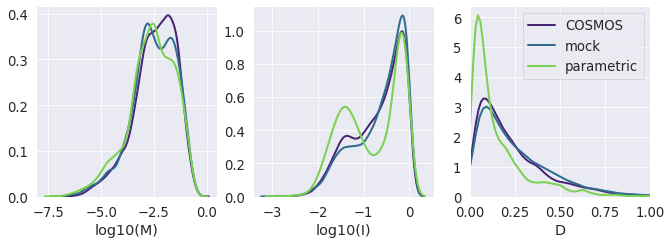

In [80]:
figure(figsize=(11,3.5))

subplot(131)
m = mask & ( log10(m_real['M']) < 0 )
sns.distplot(log10(m_real[m]['M']),   hist=False, color=creal);

m = mask & ( log10(m_mock['M']) < 0 )
sns.distplot(log10(m_mock[m]['M']),  hist=False, color=cmock);

m = mask & ( log10(m_param['M']) < 0 )
sns.distplot(log10(m_param[m]['M']),  hist=False, color=cparam);


xlabel('log10(M)')


subplot(132)

m = mask & ( log10(m_real['I']) < 0 )
sns.distplot(log10(m_real[m]['I']),   hist=False, color=creal);

m = mask & ( log10(m_mock['I']) < 0 )
sns.distplot(log10(m_mock[m]['I']),   hist=False, color=cmock);

m = mask & ( log10(m_param['I']) < 0 )
sns.distplot(log10(m_param[m]['I']),  hist=False, color=cparam);

xlabel('log10(I)')

subplot(133)

sns.distplot(m_real[mask]['D'], label='COSMOS', hist=False, color=creal);

sns.distplot(m_mock[mask]['D'], label='mock', hist=False, color=cmock);

sns.distplot(m_param[mask]['D'], label='parametric', hist=False, color=cparam);

xlim(0,1)
xlabel('D')

savefig("Figures/Figure_MID.pdf", bbox_inches = 'tight', pad_inches = 0)